Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2, time

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import numpy as np

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import csv

ALOS_ADNET_model

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"

new_model = tf.keras.models.load_model(os.path.join(path, 'ALOS_ADNET_modelkfold.h5'))

In [ ]:
import csv

# Input video file path
#video_path = '/python_programming/FYP_2022/video_classification/video_dataset/Billboardonroad.mp4'
#video_path = '/python_programming/FYP_2022/video_classification/video_dataset/EmptyRoad.mp4'
#video_path = '/python_programming/FYP_2022/video_classification/video_dataset/dove_bill.mp4'
video_path = '/python_programming/FYP_2022/video_classification/video_dataset/Billboardtoday.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) and frame dimensions
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video Information: {width}x{height} pixels, {fps} fps, {total_frames} frames")

#output_csv_path = '/python_programming/FYP_2022/video_classification/output/AdNet_model/newpreddove_adnet_0.csv'
output_csv_path = '/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_model/newpredBillboardtoday_adnet.csv'


frame_imgs = []
# Open CSV file for writing
with open(output_csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['FrameNumber', 'Label', 'Confidence_nobill', 'Confidence_bill']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Loop through each frame and make predictions
    frame_count = 0
    while True:
        # Read a single frame
        ret, frame = cap.read()

        # Break the loop if no more frames are available
        if not ret:
            break

        # Preprocess the frame
        frame = cv2.resize(frame, (224, 224))  # Resize to match the input size of the model
        frame_img = frame
        frame = frame / 255.0  # Normalize pixel values to be between 0 and 1

        # Expand dimensions to match the model's expected input shape
        frame = np.expand_dims(frame, axis=0)

        frame_imgs.append(frame_img)

        # Make predictions
        prediction = new_model.predict(frame)
        y_hat = np.argmax(prediction, axis = 1) # We take the index term of the highest probability

        print('prediction:', prediction, '|', 'yhat:', y_hat)

        #label = 'billboard' if prediction > 0.5 else 'nobillboard'
        # Determine label and confidence
        label = '1' if y_hat >= 0.5 else '0'

        confidence_nobill = prediction[0][0] #confidence score for the "nobillboard" class
        confidence_bill = prediction[0][1] #confidence score for the "billboard" class

        # Print the result
        print(f'Frame {frame_count + 1},  Label:{label},  (confidence_nobill: {confidence_nobill:.4f}) (confidence_bill: {confidence_bill:.4f})')

        # Write to CSV file
        writer.writerow({'FrameNumber': frame_count + 1, 'Label': label, 'Confidence_nobill': confidence_nobill, 'Confidence_bill': confidence_bill})

        frame_count += 1

        '''
        if (y_hat == 1):
            cv2.imwrite(f'/python_programming/FYP_2022/video_classification/output/frame_output/billboard/{frame_count}.jpg', frame_img)
        else:
            cv2.imwrite(f'/python_programming/FYP_2022/video_classification/output/frame_output/nobillboard/{frame_count}.jpg', frame_img)

        '''

        #plt.savefig('/python_programming/FYP_2022/video_classification/output/frame_output/' +frame_count+ '', bbox_inches = 'tight', pad_inches = 0)
        #plt.show()

        # Break the loop if 'q' key is pressed
        #if cv2.waitKey(1) & 0xFF == ord('q'):
            #break

print('frame count:', len(frame_imgs))

Streaming output truncated to the last 5000 lines.
Frame 2356,  Label:1,  (confidence_nobill: 0.0010) (confidence_bill: 0.9990)
1/1 [==============================] - 0s 17ms/step
prediction: [[9.2840614e-04 9.9907160e-01]] | yhat: [1]
Frame 2357,  Label:1,  (confidence_nobill: 0.0009) (confidence_bill: 0.9991)
1/1 [==============================] - 0s 31ms/step
prediction: [[0.00121141 0.99878865]] | yhat: [1]
Frame 2358,  Label:1,  (confidence_nobill: 0.0012) (confidence_bill: 0.9988)
1/1 [==============================] - 0s 16ms/step
prediction: [[0.0016518  0.99834824]] | yhat: [1]
Frame 2359,  Label:1,  (confidence_nobill: 0.0017) (confidence_bill: 0.9983)
1/1 [==============================] - 0s 16ms/step
prediction: [[0.00165235 0.99834764]] | yhat: [1]
Frame 2360,  Label:1,  (confidence_nobill: 0.0017) (confidence_bill: 0.9983)
1/1 [==============================] - 0s 31ms/step
prediction: [[0.00179166 0.9982083 ]] | yhat: [1]
Frame 2361,  Label:1,  (confidence_nobill: 0.001

Dove

In [ ]:
# Read the data from the CSV file
#data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_model/pred_act_label_dove.csv')
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_model/pred_act_label_dove_1.csv')#---->final

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
frame_num = data['Frame'].values
print(actual, '|', predicted)
print('frame_number:', frame_num)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

[0 0 0 ... 0 0 0] | [0 0 0 ... 0 0 0]
frame_number: ['Frame 1' 'Frame 2' 'Frame 3' ... 'Frame 2844' 'Frame 2845' 'Frame 2846']
confusionmatrix: [[1326  269]
 [ 311  940]]


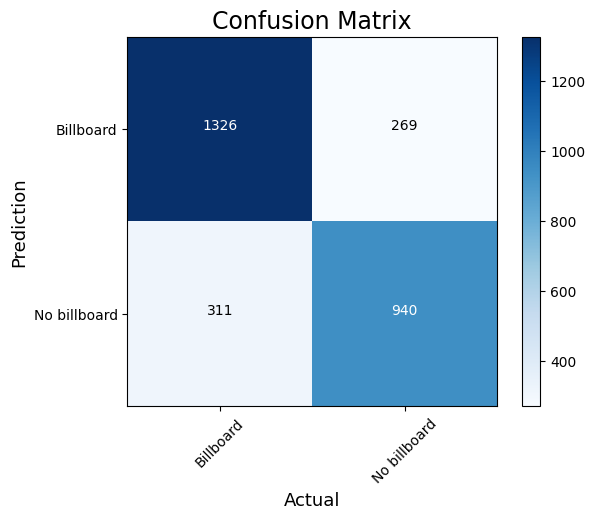

In [ ]:
# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = ['Billboard', 'No billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [ ]:
# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

Accuracy   : 0.7962052002810963
Precision : 0.7775020678246485
Recall    : 0.7513988808952837
F1-score  : 0.7642276422764228


In [ ]:
misclassified = []
label_comparison =  actual == predicted
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified) #index of the array starts from 0
print('no of missclassification:', len(misclassified))

print('framenumber:',frame_num[misclassified]) # index of the array starts from 1

plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    # Save each misclassified image with the corresponding frame number
    print('frame number:', frame_num[index])
    #ax =plt.subplot(20, 10, i+1)
    plt.title("True label: {} \n Predicted label: {}".format(actual[index], predicted[index]))
    plt.imshow(frame_imgs[index])
    plt.axis('off')
    plt.show()

    cv2.imwrite(f'/python_programming/FYP_2022/video_classification/output/frame_output/missclassified/{frame_num[index]}.jpg', frame_imgs[index])


Empty road-----> no billoard

[0 0 0 ... 0 0 0] | [0 0 0 ... 0 0 0]
confusionmatrix: [[1216   15]
 [   0    0]]


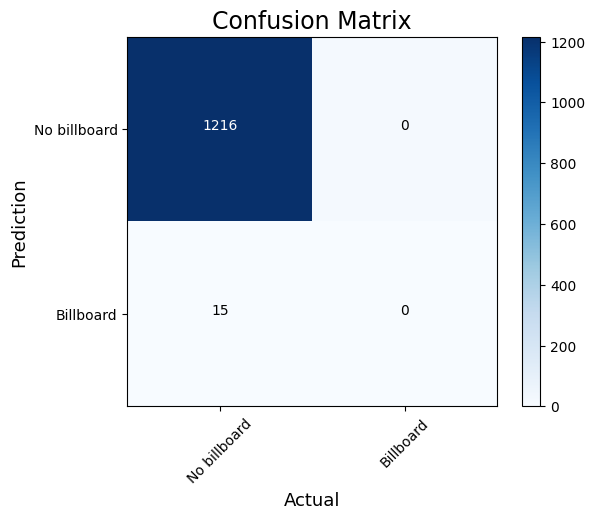

Accuracy   : 0.9878147847278635
Precision : 0.0
Recall    : 0.0
F1-score  : 0.0


C:\Users\sukri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Read the data from the CSV file
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_model/pred_act_label_emptyroad.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = [ 'No billboard', 'Billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(i, j, format(cm[i,j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

On road -----> only billboard

[1 1 1 ... 1 1 1] | [1 1 1 ... 1 1 1]
confusionmatrix: [[1573]]


IndexError: ignored

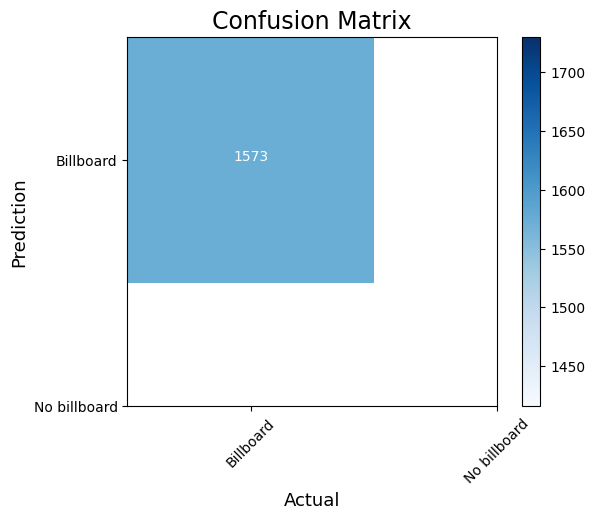

In [ ]:
# Read the data from the CSV file
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_model/pred_act_label_onroad.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = ['Billboard', 'No billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()



In [ ]:
# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

Accuracy   : 1.0
Precision : 1.0
Recall    : 1.0
F1-score  : 1.0


Billboard today

[0 0 0 ... 0 0 0] | [0 0 0 ... 0 0 0]
confusionmatrix: [[ 820  493]
 [ 232 2478]]


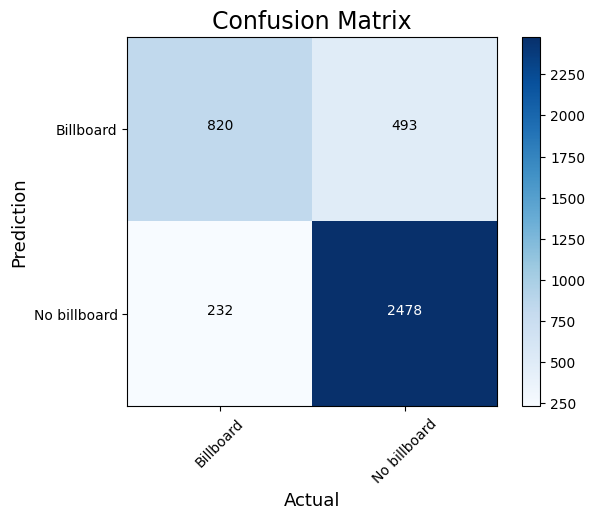

Accuracy   : 0.8197862291822023
Precision : 0.8340626051834399
Recall    : 0.9143911439114392
F1-score  : 0.8723816229537054


In [ ]:
# Read the data from the CSV file
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_model/pred_act_label_billboardtoday.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = ['Billboard', 'No billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

ADNet------VGG19 pretrained model

In [ ]:
path = f"/python_programming/FYP_2022/Models/model/"


new_model = tf.keras.models.load_model(os.path.join(path, 'ALOS_VGG19ADNET_modelkfold.h5'))

In [ ]:
#Input video file path
#video_path = '/python_programming/FYP_2022/video_classification/video_dataset/Billboardonroad.mp4'
#video_path = '/python_programming/FYP_2022/video_classification/video_dataset/EmptyRoad.mp4'
#video_path = '/python_programming/FYP_2022/video_classification/video_dataset/dove_bill.mp4'
video_path = '/python_programming/FYP_2022/video_classification/video_dataset/Billboardtoday.mp4'


# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) and frame dimensions
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video Information: {width}x{height} pixels, {fps} fps, {total_frames} frames")

#output_csv_path = '/python_programming/FYP_2022/video_classification/output/newpreddove_vgg.csv'
output_csv_path = '/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_vgg_model/newpredBillboardtoday_vgg.csv'

# Open CSV file for writing
with open(output_csv_path, mode='w', newline='') as csv_file:
    fieldnames = ['FrameNumber', 'Label', 'Confidence_nobill', 'Confidence_bill']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Loop through each frame and make predictions
    frame_count = 1
    while True:
        # Read a single frame
        ret, frame = cap.read()

        # Break the loop if no more frames are available
        if not ret:
            break

        # Preprocess the frame
        frame = cv2.resize(frame, (224, 224))  # Resize to match the input size of the model
        frame_img = frame
        frame = frame / 255.0  # Normalize pixel values to be between 0 and 1

        # Expand dimensions to match the model's expected input shape
        frame = np.expand_dims(frame, axis=0)

        # Make predictions
        prediction = new_model.predict(frame)
        y_hat = np.argmax(prediction, axis = 1) # We take the index term of the highest probability

        print('prediction:', prediction, '|', 'yhat:', y_hat)

        #label = 'billboard' if prediction > 0.5 else 'nobillboard'
        # Determine label and confidence
        label = '1' if y_hat >= 0.5 else '0'

        confidence_nobill = prediction[0][0] #confidence score for the "nobillboard" class
        confidence_bill = prediction[0][1] #confidence score for the "billboard" class

        # Print the result
        print(f'Frame {frame_count + 1},  Label:{label},  (confidence_nobill: {confidence_nobill:.4f}) (confidence_bill: {confidence_bill:.4f})')

        # Write to CSV file
        writer.writerow({'FrameNumber': frame_count + 1, 'Label': label, 'Confidence_nobill': confidence_nobill, 'Confidence_bill': confidence_bill})

        frame_count += 1



Streaming output truncated to the last 5000 lines.
prediction: [[9.484291e-09 1.000000e+00]] | yhat: [1]
Frame 2357,  Label:1,  (confidence_nobill: 0.0000) (confidence_bill: 1.0000)
1/1 [==============================] - 0s 19ms/step
prediction: [[8.159721e-09 1.000000e+00]] | yhat: [1]
Frame 2358,  Label:1,  (confidence_nobill: 0.0000) (confidence_bill: 1.0000)
1/1 [==============================] - 0s 31ms/step
prediction: [[3.926287e-09 1.000000e+00]] | yhat: [1]
Frame 2359,  Label:1,  (confidence_nobill: 0.0000) (confidence_bill: 1.0000)
1/1 [==============================] - 0s 16ms/step
prediction: [[2.156415e-09 1.000000e+00]] | yhat: [1]
Frame 2360,  Label:1,  (confidence_nobill: 0.0000) (confidence_bill: 1.0000)
1/1 [==============================] - 0s 8ms/step
prediction: [[2.1555515e-09 1.0000000e+00]] | yhat: [1]
Frame 2361,  Label:1,  (confidence_nobill: 0.0000) (confidence_bill: 1.0000)
1/1 [==============================] - 0s 16ms/step
prediction: [[2.423316e-09 1.0000

Dove billboard

[0 0 0 ... 0 0 0] | [0 0 0 ... 0 0 0]
confusionmatrix: [[ 558 1238]
 [ 228  822]]


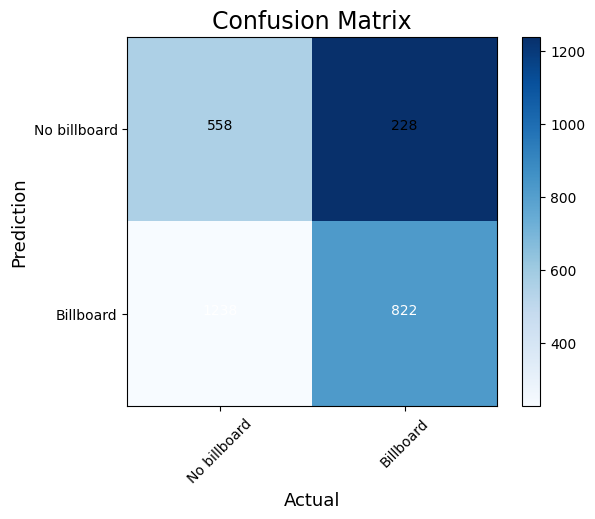

Accuracy   : 0.4848910751932537
Precision : 0.3990291262135922
Recall    : 0.7828571428571428
F1-score  : 0.5286173633440514


In [16]:
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_vgg_model/pred_act_label_dove.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
frame_number = data['Frame'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = [ 'No billboard', 'Billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(i, j, format(cm[i,j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()


# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

Empty road

[0 0 0 ... 0 0 0] | [0 0 0 ... 0 0 0]
confusionmatrix: [[448 783]
 [  0   0]]


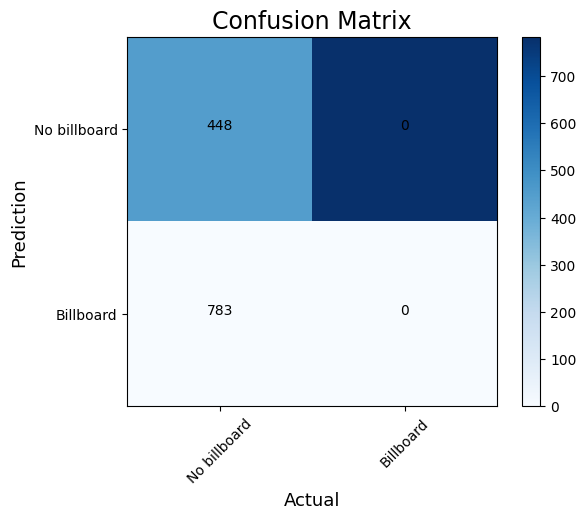

Accuracy   : 0.36393176279447603
Precision : 0.0
Recall    : 0.0
F1-score  : 0.0


C:\Users\sukri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_vgg_model/pred_act_label_emptyroad.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
frame_number = data['Frame'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = [ 'No billboard', 'Billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(i, j, format(cm[i,j], 'd'), horizontalalignment="center", color="black" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

Onroad

[1 1 1 ... 1 1 1] | [1 1 1 ... 1 1 1]
confusionmatrix: [[1573]]


IndexError: index 1 is out of bounds for axis 1 with size 1

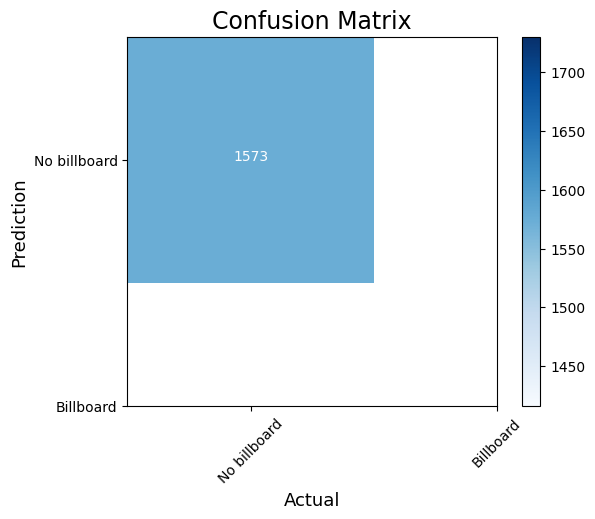

In [19]:
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_vgg_model/pred_act_label_onroad.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
frame_number = data['Frame'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)
# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = [ 'No billboard', 'Billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(i, j, format(cm[i,j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

Billboard today

[0 0 0 ... 0 0 0] | [0 0 0 ... 1 1 1]
confusionmatrix: [[ 341  972]
 [   8 2702]]


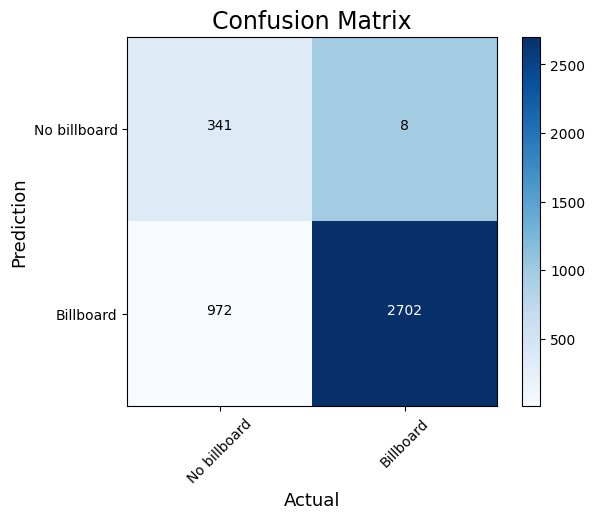

Accuracy   : 0.7564006959980114
Precision : 0.7354382144801307
Recall    : 0.9970479704797048
F1-score  : 0.8464912280701755


In [20]:
# Read the data from the CSV file
data = pd.read_csv('/python_programming/FYP_2022/video_classification/output/csv_label_output/AdNet_vgg_model/pred_act_label_billboardtoday.csv')

# Assuming your CSV file has columns named 'actual' and 'predicted'
actual = data['Actual label'].values
predicted = data['Predicted label'].values
#frame_number = data['Frame'].values
print(actual, '|', predicted)

cm = confusion_matrix(actual, predicted)

print('confusionmatrix:', cm)

# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = [ 'No billboard', 'Billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(i, j, format(cm[i,j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Finding precision and recall
accuracy = accuracy_score(actual, predicted)
print("Accuracy   :", accuracy)
precision = precision_score(actual, predicted)
print("Precision :", precision)
recall = recall_score(actual, predicted)
print("Recall    :", recall)
F1_score = f1_score(actual, predicted)
print("F1-score  :", F1_score)

In [ ]:
# Compare y_hat to y_val
misclassified = []
label_comparison =  actual == predicted
misclassified = np.where(label_comparison == False)[0]  # Get the indices of misclassified images
print('misclassified indices:',misclassified)
print('no of missclassification:', len(misclassified))
for  index in enumerate(misclassified):
     print('True label: {} ', actual[index] ,'|', 'Predicted label: {} ', predicted[index])

'''
#plt.figure(figsize=(25, 25))
for i, index in enumerate(misclassified):
    #ax =plt.subplot(9, 7, i+1)
    #plt.imshow([index])
    plt.title("True label: {} \n Predicted label: {} \n Frame num:{}".format(actual[index], predicted[index], frame_number[index]))
    plt.axis('off')
'''

In [ ]:
# Plot the confusion matrix using Matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix', fontsize=17)
plt.colorbar()

classes = ['Billboard', 'No billboard']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Actual', fontsize=13)
plt.ylabel('Prediction', fontsize=13)

# Add text annotations
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()